In [1]:
import sys
import numpy as np
import import_ipynb
from pathlib import Path
from scipy.sparse.linalg import spsolve
from scipy.constants import mu_0, epsilon_0
from IPython.display import SVG, display

# Adicionar o diretório raiz do projeto ao sys.path
project_root = Path().resolve().parent  
sys.path.append(str(project_root))
print("Project root added to sys.path:", project_root)

# Importando notebooks diretamente
try:
    import problem_statement as ps
    import matrices_assembly as assembly
    print("Modules imports were successful!")
except ModuleNotFoundError as e:
    print(f"Modules were not found: {e}")
except ImportError as e:
    print(f"Error in import: {e}")

Project root added to sys.path: C:\Users\adilt\OneDrive\05_GIT\PPGEE-2024.2-MEF
Todas as propriedades foram verificadas com sucesso para os elementos P1!
Todas as propriedades foram verificadas com sucesso para os elementos P2!
Todas as propriedades foram verificadas com sucesso para os elementos P3!
Todas as propriedades foram verificadas com sucesso para os elementos Q1!
Todas as propriedades foram verificadas com sucesso para os elementos Q2!
Modules imports were successful!


## Physics Constants

In [2]:
K0 = 2 * np.pi * 3E8 * np.sqrt(mu_0 * epsilon_0)
WAVELENGTH = 2 * np.pi / K0

# 2-noded Linear Elements, $P_1$

In [3]:
FINITE_ELEMENT = ("Triangle", 1)

BOUNDARY = [{'tag': 101,'type': 'ABC', 'value': None, 'name': 'x0'},
            {'tag': 102, 'type': 'ABC', 'value': None, 'name': 'xL'}]

MATERIAL = [{'tag': 201, 'name': 'free_space', 'electric_conductivity': 0,
                'relative_magnetic_permeability': 1, 'relative_electric_permittivity': 1},
            {'tag': 202, 'name': 'lossy_slab', 'electric_conductivity': 5E-3,
                'relative_magnetic_permeability': 1, 'relative_electric_permittivity': 2.7}]

INTERFACES = [{'tag': 301, 'type': 'Interface', 'value': None, 'name': 'xa'},
                {'tag': 302, 'type': 'Interface', 'value': None, 'name': 'xb'}]

# Define o domínio do problema
GEOMETRY = {'a': {'h': WAVELENGTH/80, 'L': WAVELENGTH*2, 'd': WAVELENGTH/4}}
mesh_data = ps.create_p1_domain(FINITE_ELEMENT, BOUNDARY, MATERIAL, INTERFACES, GEOMETRY['a'], view_mesh=False)

Malha salva em pre_processing/mesh/lossy_dielectric_slab.msh
Model lossy_dielectric_slab_abc (1D)
Info     : 7 geometric entities
Info     : 6 Physical Groups
Info     : 161 nodes in total
Info     : 160 1 elements in total


## Figure 1: Boundary conditions map

Arquivo salvo em: c:\Users\adilt\OneDrive\05_GIT\PPGEE-2024.2-MEF\ozg46_time_harmonic_1d\pre_processing\pictures\coordinates_map_LossySlabDomain.svg


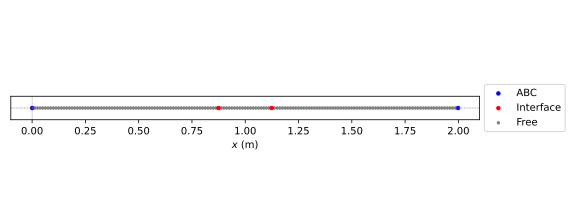

In [4]:
ps.plot_coordinates(mesh_data, Domain='LossySlab')
display(SVG(filename="pre_processing/pictures/coordinates_map_LossySlabDomain.svg"))

## FEM Solution

In [5]:
# Montagem das matrizes globais
Sg, Mg, bg = assembly.global_matrices(mesh_data)

# Aplicar condições de contorno ABC
Sg, Mg, bg = assembly.apply_simple_bcs(Sg, Mg, bg, mesh_data)

# Vetor de potencial global
Ag = Sg + Mg
ug = spsolve(Ag.tocsr(), bg.toarray())
print("Global matrices shape:", Ag.shape)
print("Global Potencial Vector shape:", ug.shape)

Applying ABC at node 1 with value 6.287535065855045j
Applying ABC at node 4 with value 6.287535065855045j
Global matrices shape: (161, 161)
Global Potencial Vector shape: (161,)


## Post-Processing

In [6]:
# Dicionário com os resultados
uh = {key+1: value for key, value in enumerate(ug)}

# Coeficientes de reflexão e transmissão
for key, node in mesh_data['nodes'].items():
    if node['bc']['name'] == 'x0':
        R_coeff = np.abs(uh[key])
        print(f"R_coeff = {R_coeff:.4f}")

    if node['bc']['name'] == 'xL':
        u_inc = np.exp(-1j * K0 * node['xg'][0])
        T_coeff = np.abs(u_inc + uh[key])
        print(f"T_coeff = {T_coeff:.4f}")

R_coeff = 0.2413
T_coeff = 0.8400


## Figure 2: Scattered and total fields for lossy dielectric slab

Arquivo salvo em: c:\Users\adilt\OneDrive\05_GIT\PPGEE-2024.2-MEF\ozg46_time_harmonic_1d\pos_processing\pictures\fem_solution_real_DielectricSlabDomain.svg


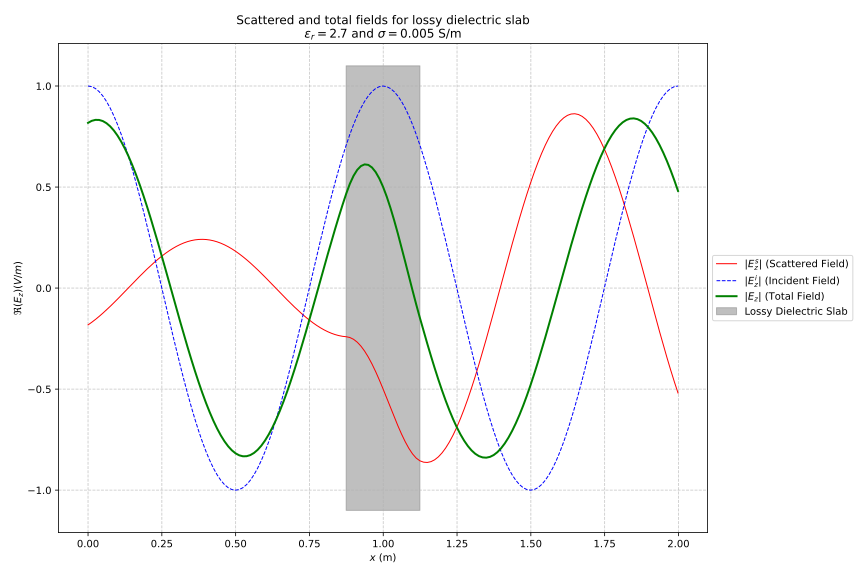

In [7]:
ps.plot_fem_solution(MATERIAL, mesh_data, uh, Domain='DielectricSlab', type='real')
display(SVG(filename="pos_processing/pictures/fem_solution_real_DielectricSlabDomain.svg"))

Arquivo salvo em: c:\Users\adilt\OneDrive\05_GIT\PPGEE-2024.2-MEF\ozg46_time_harmonic_1d\pos_processing\pictures\fem_solution_imag_DielectricSlabDomain.svg


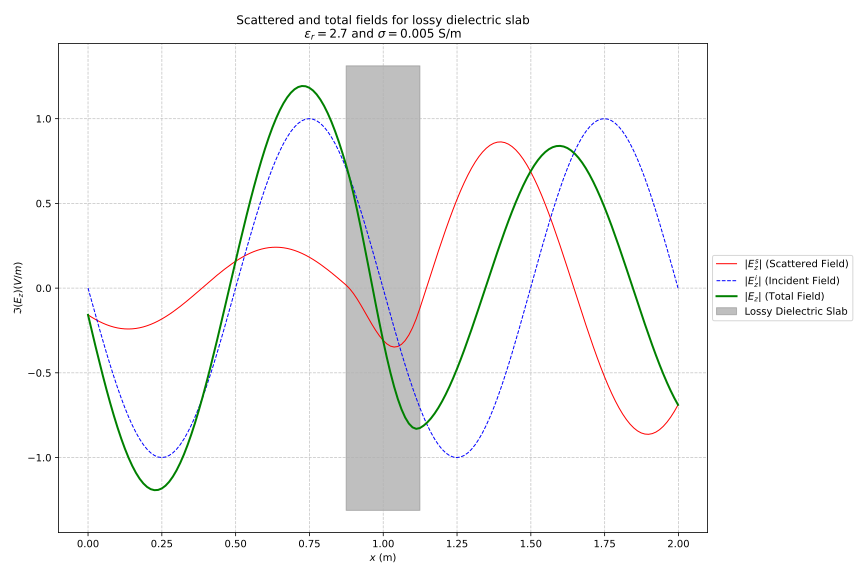

In [8]:
ps.plot_fem_solution(MATERIAL, mesh_data, uh, Domain='DielectricSlab', type='imag')
display(SVG(filename="pos_processing/pictures/fem_solution_imag_DielectricSlabDomain.svg"))

Arquivo salvo em: c:\Users\adilt\OneDrive\05_GIT\PPGEE-2024.2-MEF\ozg46_time_harmonic_1d\pos_processing\pictures\fem_solution_abs_DielectricSlabDomain.svg


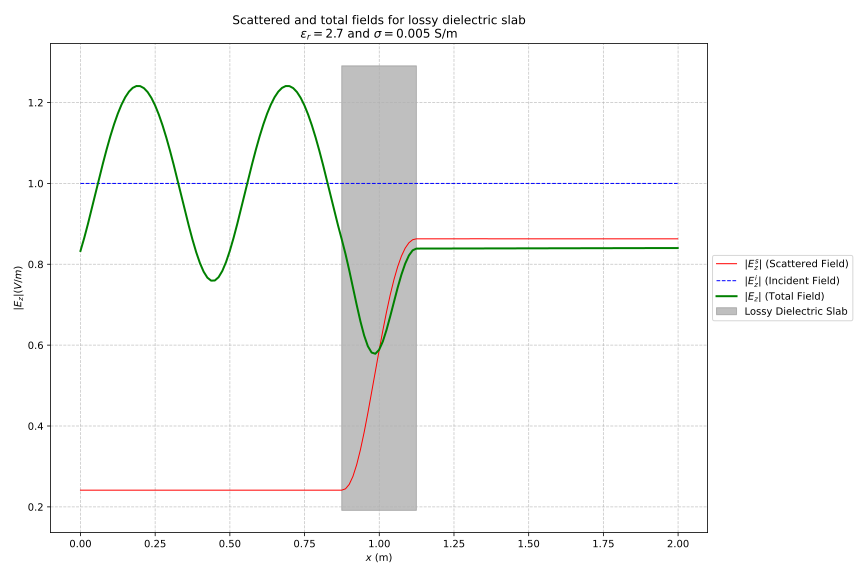

In [9]:
ps.plot_fem_solution(MATERIAL, mesh_data, uh, Domain='DielectricSlab')
display(SVG(filename="pos_processing/pictures/fem_solution_abs_DielectricSlabDomain.svg"))

Conversão do arquivo Jupyter Notebook para um script Python: ``python -m nbconvert --to script name.ipynb``

Belo Horizonte, Brazil. 2025.  
Adilton Junio Ladeira Pereira - adt@ufmg.br  
&copy; All rights reserved.